In [ ]:
import glob

from potoo.plot import *
from potoo.util import *
import sklearn

from cache import *
from constants import *
from datasets import *
from features import *
from load import *
from sp14.model import *
from util import *
from viz import *

figsize('inline_short');

In [ ]:
# Query and save recent metadata
#   - Total num recs: https://www.xeno-canto.org/explore?query=
#   - Make query strings: https://www.xeno-canto.org/explore?query=q:E
#   - Query docs: https://www.xeno-canto.org/help/search
# df = xc.query_and_save('since:30')  # days

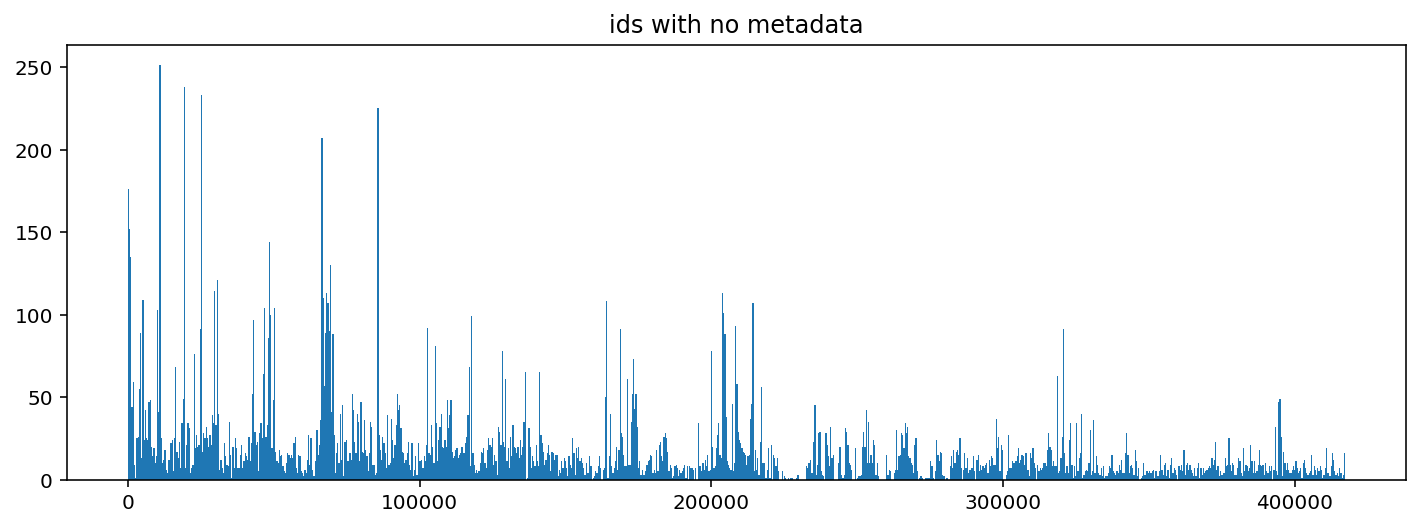

In [ ]:
plt.hist(xc.unsaved_ids, bins=1000)
plt.title('ids with no metadata')
plt.show()

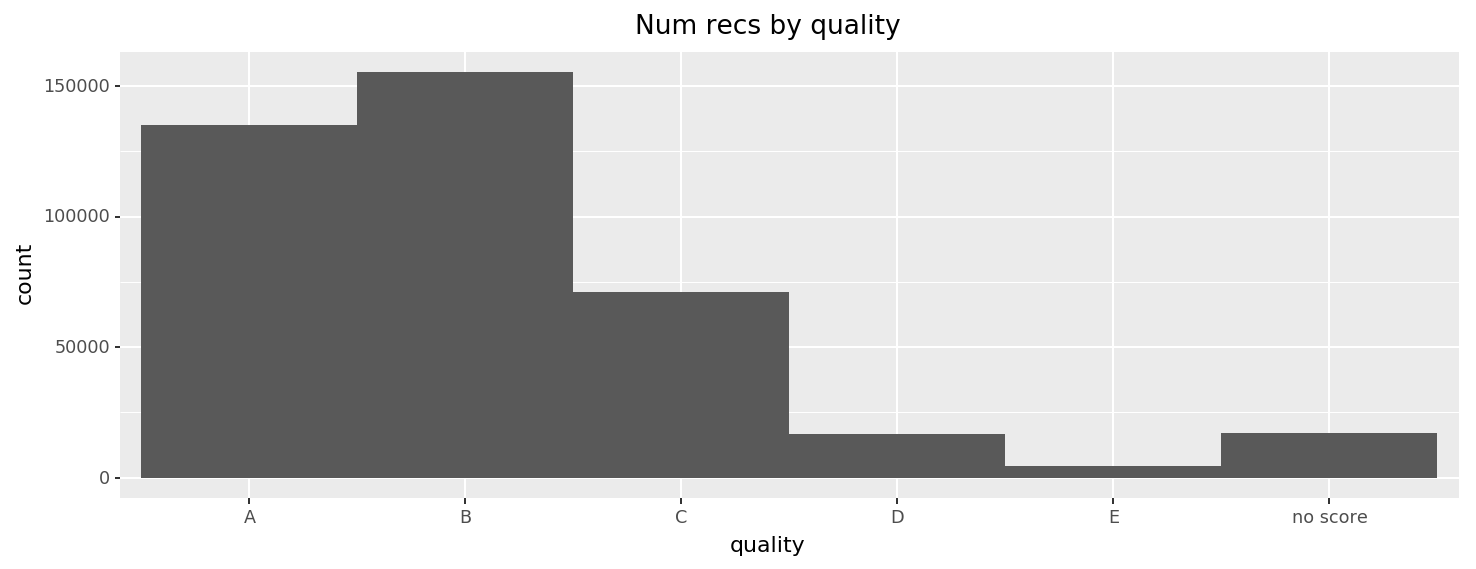

<ggplot: (-9223372036542195964)>

In [ ]:
qplot(xc.metadata.quality, geom='histogram', bins=6) + ggtitle('Num recs by quality')

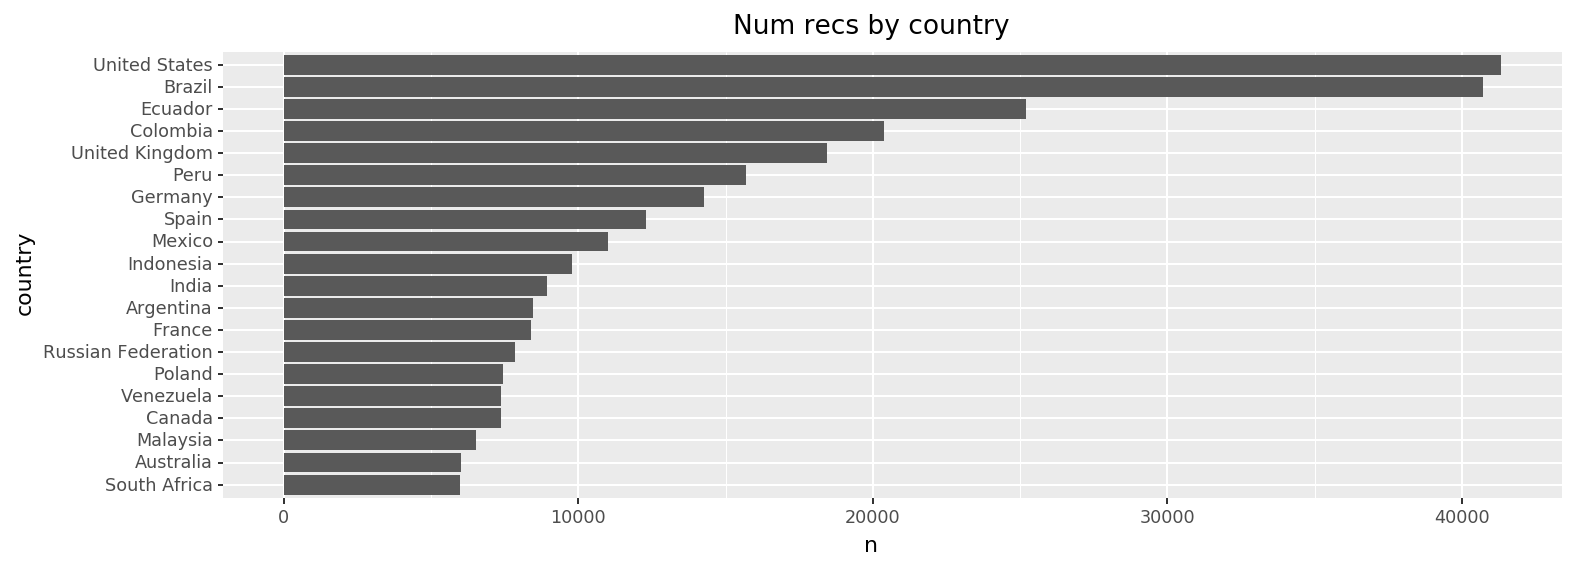

<ggplot: (339690318)>

In [ ]:
(xc.metadata
    .assign(n=1).groupby(['country'])['n'].count().reset_index()
    .pipe(df_ordered_cats, country=lambda df: df.sort_values('n').country)
    .sort_values('country', ascending=False)
    [:20]
    .pipe(ggplot, aes(x='country', y='n'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_figsize('inline_short')
    + ggtitle('Num recs by country')
)

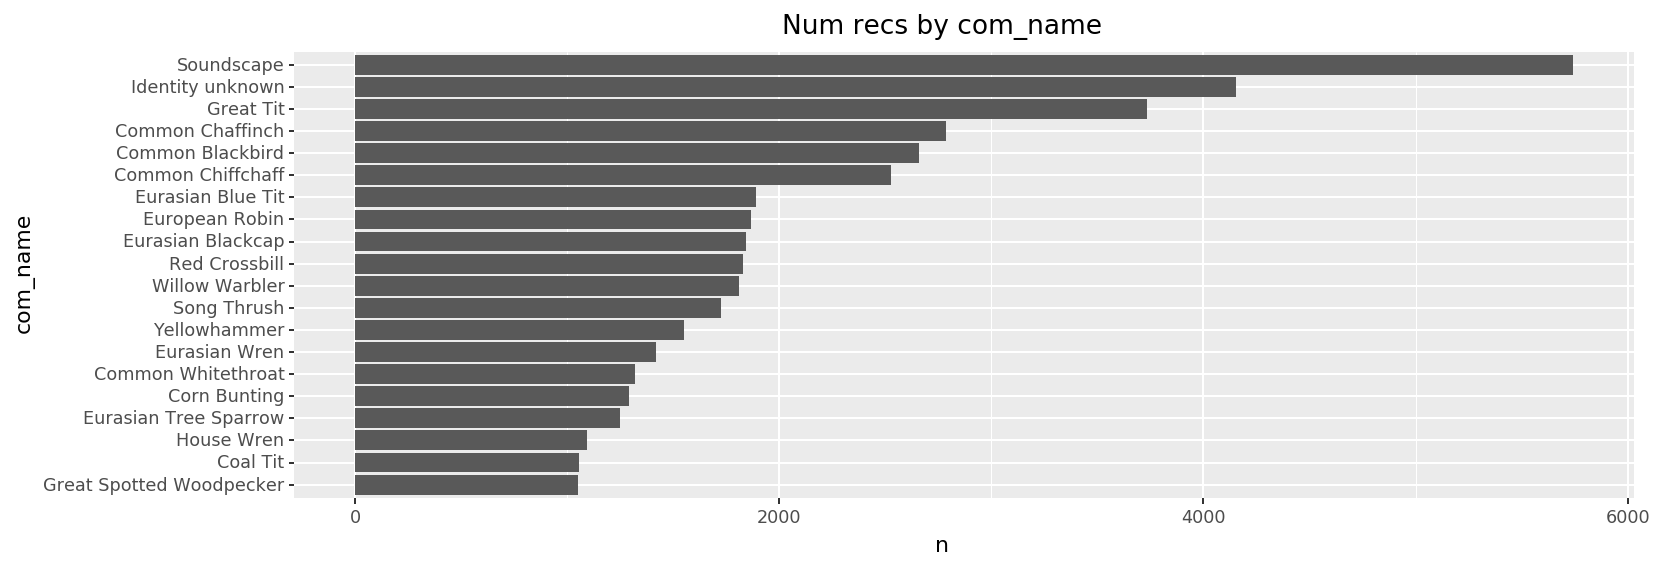

<ggplot: (-9223372036513713376)>

In [ ]:
(xc.metadata
    .assign(n=1).groupby(['com_name'])['n'].count().reset_index()
    .pipe(df_ordered_cats, com_name=lambda df: df.sort_values('n').com_name)
    .sort_values('com_name', ascending=False)
    [:20]
    .pipe(ggplot, aes(x='com_name', y='n'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_figsize('inline_short')
    + ggtitle('Num recs by com_name')
)

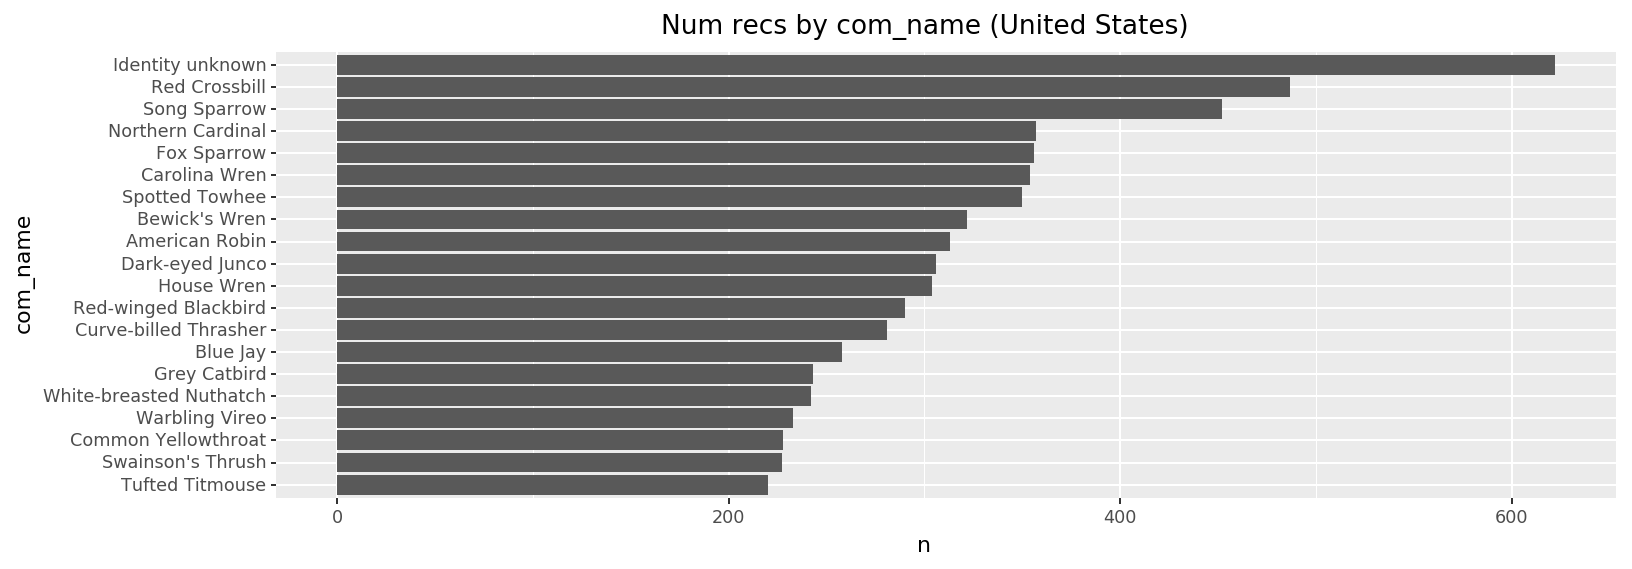

<ggplot: (-9223372036541917138)>

In [ ]:
(xc.metadata
    [lambda df: df.country == 'United States']
    .assign(n=1).groupby(['com_name'])['n'].count().reset_index()
    .pipe(df_ordered_cats, com_name=lambda df: df.sort_values('n').com_name)
    .sort_values('com_name', ascending=False)
    [:20]
    .pipe(ggplot, aes(x='com_name', y='n'))
    + geom_bar(stat='identity')
    + coord_flip()
    + theme_figsize('inline_short')
    + ggtitle('Num recs by com_name (United States)')
)

In [ ]:
# TODO TODO Move this into XCDF
(xc.metadata
    .assign(date=lambda df: (df.date
        .str.replace('-00', '-01')  # Coerce e.g. '2003-03-00' -> '2003-03-01'
        .pipe(pd.to_datetime, errors='coerce')  # Coerce remaining bad data to NaT (e.g. '1018-05-17')
    ))
    .astype({
        'lat': 'float',
        'lng': 'float',
    })
    [:10].T
)

,0,1,2,3,4,5,6,7,8,9
species_code,pepowl1,whbtap1,rinkin1,ecuthr1,yetori1,yetori1,yetori1,rempar,rempar,gycpar1
id,99999,99998,99997,99996,99995,99994,99993,99992,99991,99990
sci_name,Glaucidium peruanum,Eleoscytalopus indigoticus,Megaceryle torquata,Turdus maculirostris,Icterus mesomelas,Icterus mesomelas,Icterus mesomelas,Psittacara erythrogenys,Psittacara erythrogenys,Brotogeris pyrrhoptera
com_name,Pacific Pygmy Owl,White-breasted Tapaculo,Ringed Kingfisher,Ecuadorian Thrush,Yellow-tailed Oriole,Yellow-tailed Oriole,Yellow-tailed Oriole,Red-masked Parakeet,Red-masked Parakeet,Grey-cheeked Parakeet
subspecies,,,torquata,,taczanowskii,taczanowskii,taczanowskii,,,
recordist,Leonardo Ordóñez-Delgado,Rodrigo Dela Rosa,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado,Leonardo Ordóñez-Delgado
country,Ecuador,Brazil,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador,Ecuador
locality,Hacienda La Clementina (Los Ríos),São José dos Campos-SP,Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja),Carretera Limón - La Victoria (Macará - Loja)
lat,-1.71,NaN,-4.44,-4.44,-4.44,-4.44,-4.44,-4.44,-4.44,-4.44
lng,-79.4,NaN,-79.8,-79.8,-79.8,-79.8,-79.8,-79.8,-79.8,-79.8


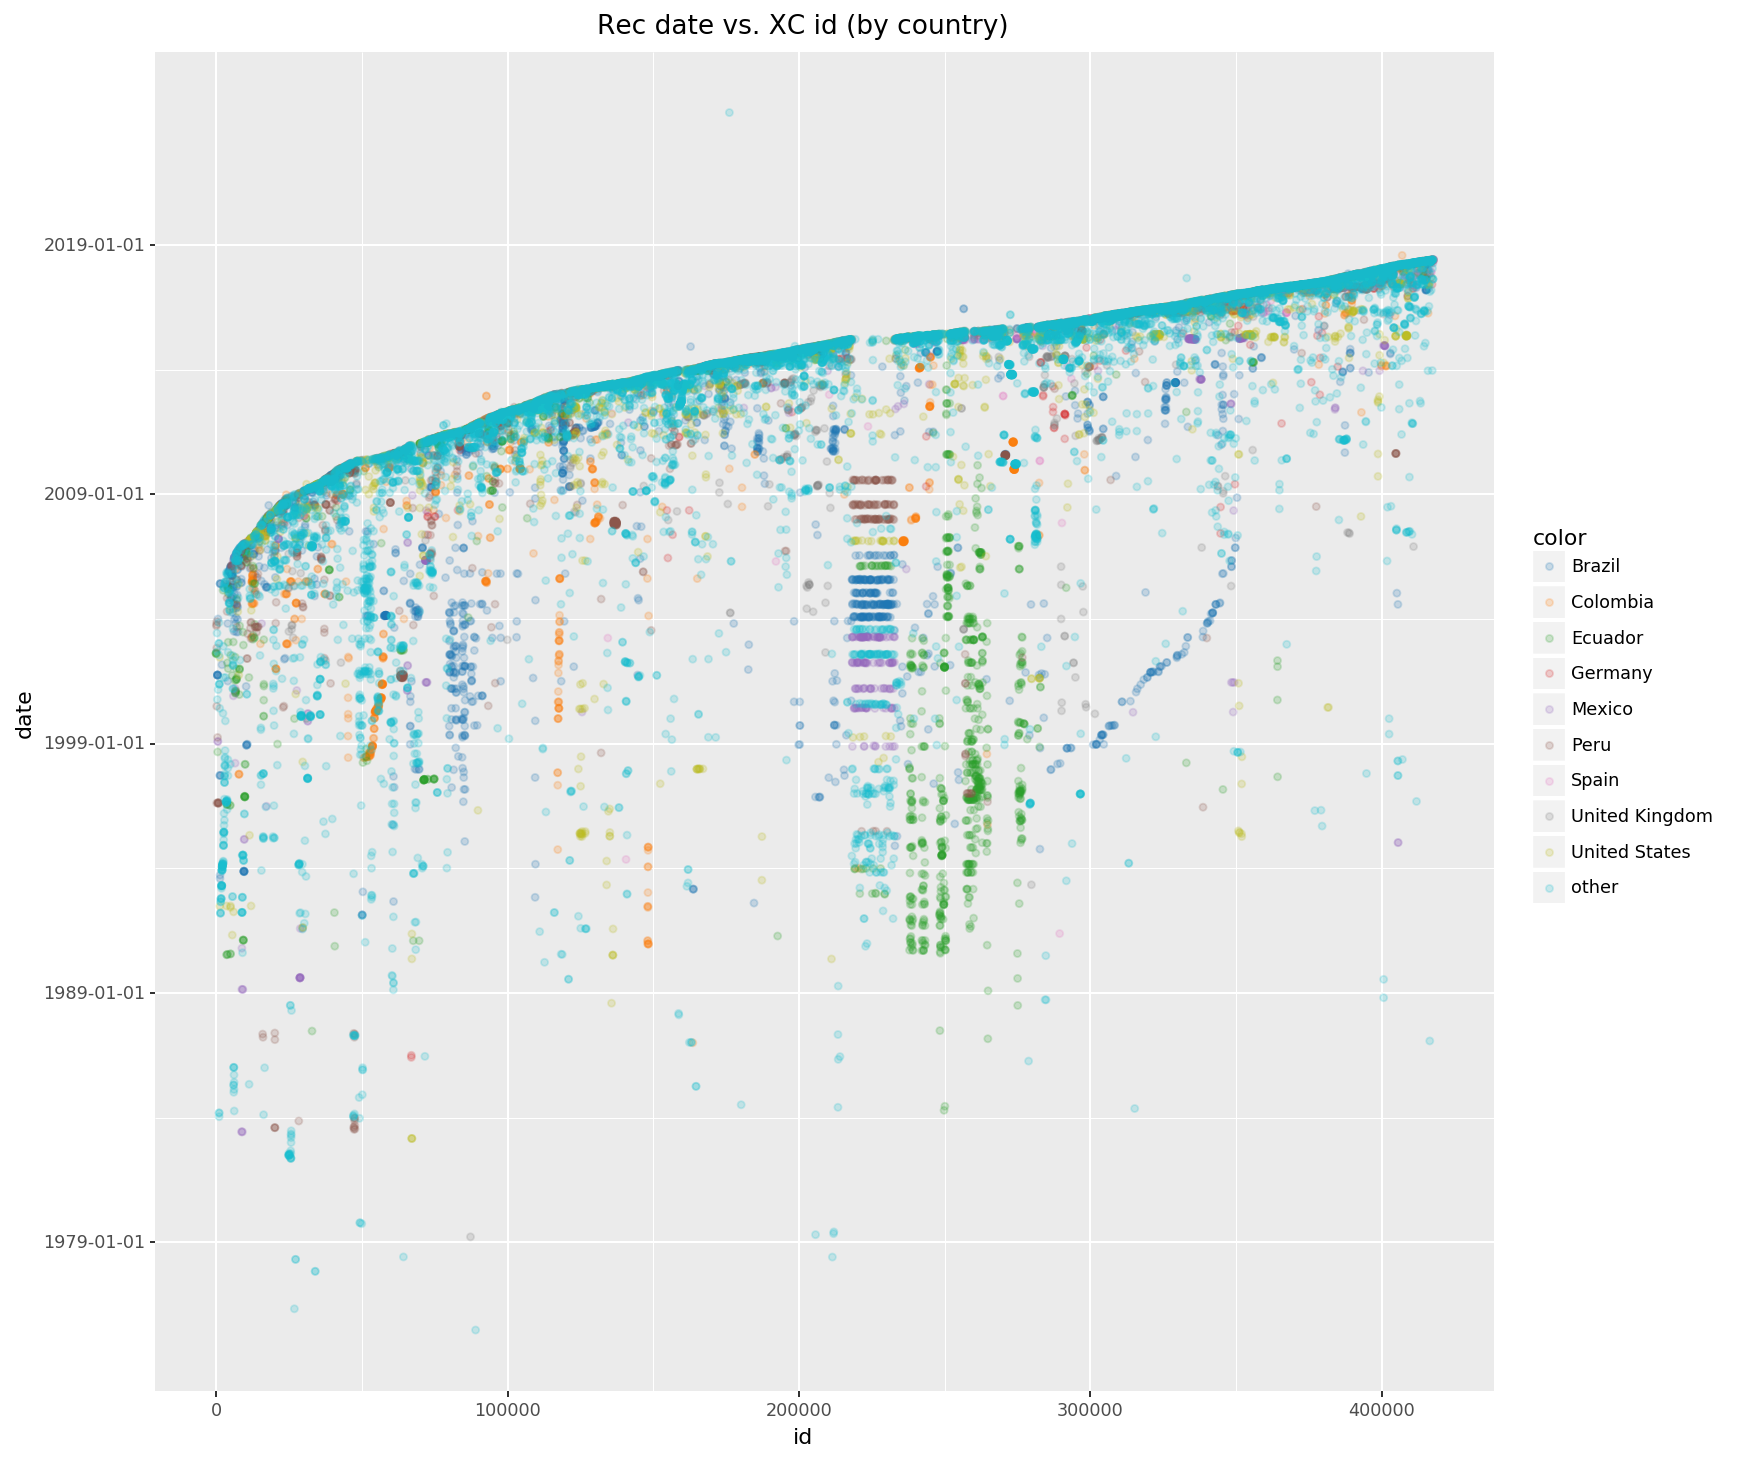

<ggplot: (-9223372036500827595)>

In [ ]:
(xc.metadata
    .assign(date=lambda df: (df.date
        .str.replace('-00', '-01')  # Coerce e.g. '2003-03-00' -> '2003-03-01'
        .pipe(pd.to_datetime, errors='coerce')  # Coerce remaining bad data to NaT (e.g. '1018-05-17')
    ))
    .astype({'id': 'int'})
    .fillna({'date': pd.to_datetime('2000-01-01')}) # plotnine barfs on NaT
    .sample(20_000, random_state=0)
    .assign(color=lambda df: df.country.map(lambda x: x if x in [
        'United States',
        'Brazil',
        'Ecuador',
        'Colombia',
        'United Kingdom',
        'Peru',
        'Germany',
        'Spain',
        'Mexico',
        # 'Indonesia',
        # 'India',
    ] else 'other'))
    .pipe(ggplot, aes(x='id', y='date', color='color'))
    + geom_point(alpha=.2)
    + scale_color_cmap_d(mpl.cm.tab10)
    + theme_figsize('square')
    + ggtitle('Rec date vs. XC id (by country)')
)

In [ ]:
display(
    df_summary(xc.metadata).T,
    (xc.metadata
        .sample(100, random_state=0)
        # .sort_values('species_code')
        .sort_values('id')
    ),
)

,,,,,,,,min,25%,50%,75%,max
,dtype,sizeof,len,count,nunique,mean,std,,,,,
species_code,object,24.3 MiB,399859,399859,9443,NaN,NaN,___unk,coltro1,horbab2,rutsol1,zothaw
id,object,23.9 MiB,399859,399859,399859,NaN,NaN,1,194689,288134,380631,99999
sci_name,object,28.8 MiB,399859,399859,9821,NaN,NaN,Abeillia abeillei,Cyphorhinus arada,Melocichla mentalis,Pyrrhomyias cinnamomeus,Zosterornis whiteheadi
com_name,object,28.4 MiB,399859,399859,9822,NaN,NaN,'Alto Pisones' Tapaculo,Common Swift,Kadavu Fantail,Scale-crested Pygmy Tyrant,Zone-tailed Hawk
subspecies,object,23.7 MiB,399859,399859,8260,NaN,NaN,,,,,Х Phylloscopus examinandus
recordist,object,27.8 MiB,399859,399859,5263,NaN,NaN,Alejandro Pinto-Gómez,Fernando Igor de Godoy,Lynette Rudman,Peter Boesman,高建云(Jianyun Gao)
country,object,24.9 MiB,399859,399859,191,NaN,NaN,Afghanistan,Colombia,Japan,Spain,mexico
locality,object,38.3 MiB,399859,399859,47622,NaN,NaN,,"Esmeraldas: Playa de Oro, village and vicinity, Río Santiago","Mgahinga National Park, Kisoro","Ryedale District (near Helperthorpe), North Yorkshire, England","﻿Santuario Otun-Quimbaya, Pereira, Tolima"
lat,object,23.7 MiB,399859,381899,55747,NaN,NaN,-0.001,-4.335,31.34,49.634,9.9987


,species_code,id,sci_name,com_name,subspecies,recordist,country,locality,lat,lng,type,quality,date,time,download,license,url
398814,corcra,100964,Crex crex,Corn Crake,,Mathias Ritschard,Poland,Bialowieza,52.7167,23.8334,song,A,2012-05-10,daytime,//www.xeno-canto.org/100964/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/100964
395614,yebcha,104108,Icteria virens,Yellow-breasted Chat,virens,Mike Nelson,United States,"Seven Islands Wildlife Refuge, Knoxville, Tennessee",35.9439,-83.6889,"call, song",B,2012-06-17,3:30pm,//www.xeno-canto.org/104108/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/104108
394848,juntit1,104838,Baeolophus ridgwayi,Juniper Titmouse,,Eric DeFonso,United States,"No Thoroughfare Canyon, Colorado National Monument, Colorado",39.029,-108.63,song,C,2012-06-15,06:14,//www.xeno-canto.org/104838/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/104838
394140,tawpip1,105561,Anthus campestris,Tawny Pipit,,Jordi Calvet,Spain,"Timoneda d'Alfés, Lleida, Catalonia",41.5528,0.6501,song,A,2012-06-30,7:27,//www.xeno-canto.org/105561/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/105561
394035,pavpig2,105663,Patagioenas cayennensis,Pale-vented Pigeon,,Eric DeFonso,Colombia,"SFF Otun-Quimbaya, Risaralda",4.727,-75.577,song,C,2011-02-05,18:03,//www.xeno-canto.org/105663/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/105663
392495,perwre1,10714,Cinnycerthia peruana,Peruvian Wren,,Charles Hesse,Peru,"Paty Trail, Huanuco",-9.6334,-76.1334,Call,no score,2006-06-04,13:38,//www.xeno-canto.org/10714/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/10714
391457,gilhum1,108143,Hylocharis chrysura,Gilded Sapphire,,Bernabe Lopez-Lanus,Argentina,"Estancia La Sirena, Ruta 40 y 42, San Martin, Corrientes",-28.3948,-56.5389,Song,B,2011-11-27,pm,//www.xeno-canto.org/108143/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/108143
391426,bobfly1,108171,Megarynchus pitangua,Boat-billed Flycatcher,,Bernabe Lopez-Lanus,Argentina,"Estancia Virocay, Virasoro, Corrientes",-28.1498,-55.8401,Song,B,2011-11-24,am,//www.xeno-canto.org/108171/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/108171
389315,eurwar2,110304,Locustella fluviatilis,River Warbler,,Patrik Åberg,Sweden,"Landbyn, Hjo, Västra Götaland County",58.2277,14.2444,song,A,2012-05-30,22:21,//www.xeno-canto.org/110304/download,//creativecommons.org/licenses/by-nc-sa/3.0/,https://www.xeno-canto.org/110304
389225,grcgre1,110399,Podiceps cristatus,Great Crested Grebe,,Alexandre Renaudier,France,"Delta de la Dranse, Haute-Savoie",46.4009,6.5139,begging calls and adult 'song',C,2012-09-02,?,//www.xeno-canto.org/110399/download,//creativecommons.org/licenses/by-nc-nd/2.5/,https://www.xeno-canto.org/110399
